  # Intro to Classification Algorithms

Import pandas

In [1]:
import pandas as pd

Load the clean titanic data

In [2]:
train = pd.read_csv('clean_train.csv')

Inspect the data with `info()` and `head()`

In [3]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_clean    891 non-null    float64
 13  Is_female    891 non-null    bool   
 14  Emb_C        891 non-null    int64  
 15  Emb_Q        891 non-null    int64  
 16  Emb_S        891 non-null    int64  
 17  Fare_usd     891 non-null    float64
 18  Family_size  891 non-null    int64  
 19  Title   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_C,Emb_Q,Emb_S,Fare_usd,Family_size,Title,Mr,Mrs,Miss,Master
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,9.42500,1,Mr,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,92.66829,1,Mrs,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,10.30250,0,Miss,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,69.03000,1,Mrs,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,10.46500,0,Mr,1,0,0,0


Create two variables for features (Age_clean, Is_female, Pclass, emb_C, emb_Q, emb_S, Fare) and target (Survived).  

In [4]:
features = train[['Age_clean', 'Is_female', 'Pclass', 'Emb_C', 'Emb_Q', 'Emb_S', 'Fare']]
target = train.Survived

Import `train_test_split` from `sklearn.model_selection`

In [5]:
from sklearn.model_selection import train_test_split

Split the titanic data into training sets and test sets

In [6]:
f_train, f_test, t_train, t_test = train_test_split(features, target, test_size = .2, random_state=0)

In [7]:
f_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 495 to 372
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age_clean  179 non-null    float64
 1   Is_female  179 non-null    bool   
 2   Pclass     179 non-null    int64  
 3   Emb_C      179 non-null    int64  
 4   Emb_Q      179 non-null    int64  
 5   Emb_S      179 non-null    int64  
 6   Fare       179 non-null    float64
dtypes: bool(1), float64(2), int64(4)
memory usage: 10.0 KB


In [8]:
f_test.shape

(179, 7)

Import the `KNeighborsClassifier` from `sklearn.neighbors`

In [9]:
from sklearn.neighbors import KNeighborsClassifier

Create and train a KNN model

In [10]:
model = KNeighborsClassifier(5, weights = 'uniform') # entered default values
model.fit(f_train, t_train)

KNeighborsClassifier()

Make predictions with test data

In [11]:
print(model.predict(f_test))
print(list(t_test))

[1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0
 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]


Predict probabilities

In [12]:
model.predict_proba(f_test) # says the probability of survival and non-survival for 5 neareast neighbors

# each row is an instance of 5 nearest neighbors

array([[0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0. , 1. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.4,

Check the classes of the model

In [13]:
# similar to shape for a data frame

model.classes_

array([0, 1], dtype=int64)

Score the model

In [14]:
model.score(f_test, t_test) # % of predictions that are correct on test set

# here we know the outcome of the passengers

0.7206703910614525

### Stratified KFolds Crossvalidation

Import `cross_val_score`,`StratifiedKFold`,`RepeatedStratifiedKFold` from `sklearn.model_selection`

In [15]:
# shuffle and split is a way of cross validating model. 
# kfolds cross validation is more popular, 5 is a common value

from sklearn.model_selection import cross_val_score, StratifiedKFold, RepeatedStratifiedKFold

Use `cross_val_score` to evaluate model performance

In [16]:
# great way of scoring your model: in one line of code, built 5 different versions of the model
cross_val_score(model, features, target) 

array([0.62011173, 0.6741573 , 0.70786517, 0.71910112, 0.70786517])

In [17]:
# tested and checked the average score of the model
# creates 5 samples of the data, changing n_splits gives n samples
cross_val_score(model, features, target)

array([0.62011173, 0.6741573 , 0.70786517, 0.71910112, 0.70786517])

Use `StratifiedKFold` to shuffle the data

In [18]:
# default is StratifiedKFold, but with shuffle = False

# shuffles the data

cross_val_score(model, features, target, cv=StratifiedKFold(shuffle=True))

array([0.74301676, 0.66853933, 0.69101124, 0.66292135, 0.73033708])

Use `RepeatedStratifiedKFold` to calculate multiple iterations of crossvalidation

In [19]:
# default Repeats = 10, * 5 for 5 kfolds, hence 50 values
# each row representing 1 set of kfolds
cross_val_score(model, features, target, cv=RepeatedStratifiedKFold(random_state=0))

array([0.68156425, 0.65168539, 0.70786517, 0.75280899, 0.7247191 ,
       0.67039106, 0.65730337, 0.62921348, 0.67977528, 0.75842697,
       0.75977654, 0.65730337, 0.66292135, 0.71910112, 0.71348315,
       0.67039106, 0.69101124, 0.69101124, 0.69101124, 0.69101124,
       0.67597765, 0.6741573 , 0.70786517, 0.6741573 , 0.69101124,
       0.67039106, 0.75280899, 0.66853933, 0.71348315, 0.71910112,
       0.69832402, 0.61797753, 0.75280899, 0.67977528, 0.6741573 ,
       0.68715084, 0.68539326, 0.67977528, 0.69662921, 0.69662921,
       0.68156425, 0.69662921, 0.74719101, 0.71348315, 0.68539326,
       0.68156425, 0.69101124, 0.71910112, 0.70786517, 0.63483146])

In [20]:
model = KNeighborsClassifier(15, weights='distance')
cross_val_score(model, features, target, cv=RepeatedStratifiedKFold(random_state=0))

array([0.77653631, 0.66853933, 0.70224719, 0.80337079, 0.69662921,
       0.74860335, 0.71910112, 0.70786517, 0.70224719, 0.78089888,
       0.70949721, 0.70786517, 0.71348315, 0.69662921, 0.73033708,
       0.66480447, 0.67977528, 0.74719101, 0.74157303, 0.76404494,
       0.75418994, 0.71910112, 0.70786517, 0.67977528, 0.76404494,
       0.74301676, 0.7752809 , 0.70786517, 0.69662921, 0.74719101,
       0.69273743, 0.67977528, 0.74719101, 0.74719101, 0.70224719,
       0.70949721, 0.70224719, 0.75280899, 0.7247191 , 0.7247191 ,
       0.69273743, 0.73595506, 0.76404494, 0.7247191 , 0.71910112,
       0.72067039, 0.71348315, 0.74719101, 0.79213483, 0.66853933])

### Exercise 
__Create a for loop to score both uniform and distance weighted models for different values of k to determine optimal model parameters (Note: Don't use RepeatedStratifiedKFold to avoid long processing times)__ 

In [21]:
for k in range(1,5,1):
    model = KNeighborsClassifier(k, weights='uniform')
    avg_score = cross_val_score(model, features, target, cv=StratifiedKFold(shuffle=True, random_state=0)).mean()
    print(k, '-', avg_score)

1 - 0.6913439206578369
2 - 0.694739815454146
3 - 0.7014876655577177
4 - 0.694739815454146


In [22]:
# creating containers to store different scores
k_values, distance_scores, uniform_scores = [], [], []

## random state not set to 0 implies 1 shuffle differs from the other
    
# for loop to test different number of neighbors
for k in range(1,101,1):
    # score uniform weighted model
    model_u = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    avg_score_u = cross_val_score(model_u, features, target, cv=StratifiedKFold(shuffle=True)).mean()
    uniform_scores.append(avg_score_u)

    # score distance weighted model
    model_d = KNeighborsClassifier(n_neighbors=k, weights='distance')
    avg_score_d = cross_val_score(model_d, features, target, cv=StratifiedKFold(shuffle=True)).mean()
    distance_scores.append(avg_score_d)
    
    # store corresponding number of neighbords
    k_values.append(k)

#### Bonus Challenge: Store the model scores in a DataFrame

In [23]:
knn_results = pd.DataFrame({'distance_weighted': distance_scores, 
                           'uniform_weighted': uniform_scores},
                            index=k_values)
knn_results

,distance_weighted,uniform_weighted
1,0.693641,0.682349
2,0.684634,0.671151
3,0.713753,0.692449
4,0.702574,0.695845
5,0.696937,0.689084
...,...,...
96,0.717193,0.664447
97,0.714965,0.659946
98,0.724983,0.666694
99,0.720539,0.659871


<AxesSubplot:>

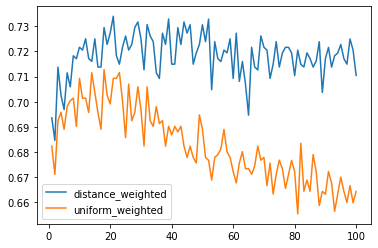

In [24]:
knn_results.plot()

## Data Normalization

Calculate the mean and standard deviation of Age_clean and Fare

In [25]:
# scaling data 
avg_age = train.Age_clean.mean()
std_age = train.Age_clean.std()

In [26]:
avg_fare = train.Fare.mean()
std_fare = train.Fare.std()

Subtract the mean and divide by the standard deviation

In [27]:
train['Age_norm'] = (train.Age_clean - avg_age)/std_age
train['Fare_norm'] = (train.Fare - avg_fare)/std_fare

Create new features using normalized data (Age_norm, Is_female, Pclass, emb_C, emb_Q, emb_S, Fare_norm)

In [28]:
features_norm = train[['Age_norm', 'Is_female', 'Pclass', 'Emb_C', 'Emb_Q', 'Emb_S', 'Fare_norm']]

Score the KNN on normalized data with a for loop comparing different numbers of neighbors

In [29]:
KNeighborsClassifier?

In [30]:
# feature engineering
model = KNeighborsClassifier(30, weights = 'distance')
cross_val_score(model, features_norm, target, cv=RepeatedStratifiedKFold(random_state=0))

array([0.84357542, 0.79213483, 0.80337079, 0.7752809 , 0.76966292,
       0.77094972, 0.80898876, 0.84831461, 0.7752809 , 0.79775281,
       0.7877095 , 0.8258427 , 0.7752809 , 0.82022472, 0.80337079,
       0.78212291, 0.79213483, 0.82022472, 0.81460674, 0.81460674,
       0.83798883, 0.79775281, 0.79775281, 0.78651685, 0.78651685,
       0.79329609, 0.83707865, 0.79775281, 0.78651685, 0.8258427 ,
       0.7877095 , 0.76966292, 0.83707865, 0.81460674, 0.8258427 ,
       0.77094972, 0.76966292, 0.81460674, 0.82022472, 0.83146067,
       0.80446927, 0.79775281, 0.78651685, 0.81460674, 0.78651685,
       0.84357542, 0.79775281, 0.8258427 , 0.83146067, 0.7752809 ])

In [31]:
cross_val_score(model, features_norm, target, cv=RepeatedStratifiedKFold(random_state=0)).mean()

0.8034806352394703

## Random Forest

Import the `RandomForestClassifier` from `sklearn.ensemble`

In [32]:
from sklearn.ensemble import RandomForestClassifier

Create a model and train it on the training sets

In [33]:
model = RandomForestClassifier()

In [34]:
model.fit(features, target)

RandomForestClassifier()

In [35]:
model.feature_importances_

array([0.29041801, 0.27172963, 0.10059155, 0.01083895, 0.00685608,
       0.01480224, 0.30476354])

In [36]:
features.columns

Index(['Age_clean', 'Is_female', 'Pclass', 'Emb_C', 'Emb_Q', 'Emb_S', 'Fare'], dtype='object')

Calculate the score for the Random Forest model using the test sets

In [37]:
cross_val_score(model, features, target, cv=StratifiedKFold(shuffle=True))

array([0.81564246, 0.81460674, 0.79213483, 0.79213483, 0.83146067])

### Exercise
__Add more features to your model to try and improve the performance of your model__

In [38]:
final_features = train[['Age_clean', 'Is_female', 'Pclass', 'Fare', 'Family_size']]

In [39]:
cross_val_score(model, final_features, target, cv=StratifiedKFold(shuffle=True))

array([0.83240223, 0.81460674, 0.80898876, 0.78089888, 0.84831461])

### Make a Prediction for Kaggle

Train the model using the best data available (in the case of the Titanic you'll use all the data)

In [40]:
final_model = RandomForestClassifier()
final_model.fit(final_features, target)

RandomForestClassifier()

Create a DataFrame with the clean_test.csv data

In [41]:
test = pd.read_csv('clean_test.csv')

Investigate the test data

In [42]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Age_clean    418 non-null    float64
 12  Is_female    418 non-null    bool   
 13  Emb_C        418 non-null    int64  
 14  Emb_Q        418 non-null    int64  
 15  Emb_S        418 non-null    int64  
 16  Family_size  418 non-null    int64  
 17  Title        418 non-null    object 
 18  Mr           418 non-null    int64  
 19  Mrs     

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Is_female,Emb_C,Emb_Q,Emb_S,Family_size,Title,Mr,Mrs,Miss,Master
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,False,0,0,1,0,Mr,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,True,1,0,0,1,Mrs,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,False,0,0,1,0,Mr,1,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,False,0,0,1,0,Mr,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,True,0,0,1,2,Mrs,0,1,0,0


Select the same features from test data (Age_clean, Is_female, Pclass, emb_C, emb_Q, emb_S, Fare)

In [43]:
test_features = test[['Age_clean', 'Is_female', 'Pclass', 'Fare', 'Family_size']] # variable order matters

# flipping from predictor to predicted variable can produce inaccurate results


Create predictions

In [44]:
predictions = final_model.predict(test_features)

Add Predictions as a new column (Survived) in the DataFrame with the test data

In [45]:
test['Survived'] = predictions

Save as CSV (make sure you set index=False)

In [46]:
kaggle_df = test[['PassengerId', 'Survived']]

In [47]:
kaggle_df.to_csv('kaggle_submission20210430.csv', index=False)